P S V N Bhavani Shankar - S20170010105 <br>
Pavan Kumar Anand - S20170020230<br>
Hemanth Sanisetty - S20170010138<br>
Somana Venkata Sai Krishna Rupesh - S20170020241<br>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.gofplots import qqplot
from sklearn import utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


DATA CLEANING

In [ ]:
data= pd.read_excel('AirQualityUCI.xlsx')
print(data.head())
data['DateTime'] = data['Date'].astype(str)+ ' ' + data['Time'].astype(str)
data.drop(['Time'], axis=1, inplace=True)
data['DateTime'] = pd.to_datetime(data['DateTime'].astype(str), format='%Y-%m-%d %H:%M:%S')
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y-%m-%d')
data['Year'] = data['DateTime'].map(lambda x:x.year)
data['YearMonth'] = pd.to_datetime(data.DateTime).dt.to_period('m')


feature_columns = list(set(list(data.columns)) - set(['Date','YearMonth','DateTime','Year','CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)',]))
other_columns = list(set(['Date','YearMonth','Year','DateTime']))
Targets_colums = list(set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))
indep_col = list(set(list(feature_columns)) - set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))
print(data[other_columns])
print(data[feature_columns])

        Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]
     YearMonth       Date            DateTime  Year
0      2004-03 2004-03-10 2004-03-10 18:00:00  2004
1      2004-03 2004-03-10 2004-03-10 19:00:00  2004
2      2004-03 2004-03-10 2004-03-10 20:00:00  2004
3      2004-03 2004-03-10 2004-03-10 21:00:00  2004
4      2004-03 2004-03-10 2004-03-10 22:00:00  2004
...        ...        ...                 ...   ...
9352   2005-04 2005-04-04 2005-04-04 10:00:00  2005
9353   2005-04 2005-04-04 2005-04-04 11:00:00  2005
9354   2005-04 2005-04-04 2005-04-04 12:00:00  2005
9355   2005-04 2005-04-04 2005-04-04 13:00:00  2005
9356   2005-04 2005-0

In [ ]:
indep_col = list(set(list(feature_columns)) - set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))

        Date  CO(GT)  PT08.S1(CO)  ...            DateTime  Year  YearMonth
0 2004-03-10     2.6      1360.00  ... 2004-03-10 18:00:00  2004    2004-03
1 2004-03-10     2.0      1292.25  ... 2004-03-10 19:00:00  2004    2004-03
2 2004-03-10     2.2      1402.00  ... 2004-03-10 20:00:00  2004    2004-03
3 2004-03-10     2.2      1375.50  ... 2004-03-10 21:00:00  2004    2004-03
4 2004-03-10     1.6      1272.25  ... 2004-03-10 22:00:00  2004    2004-03

[5 rows x 17 columns]
Date             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
DateTime         False
Year             False
YearMonth        False
dtype: bool
Date             0.000000
CO(GT)           0.179865
PT08.S1(CO)      0.039115
NMHC(GT)         0.902319
C6H6(GT)      

Date                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
Year                0
YearMonth           0
dtype: int64

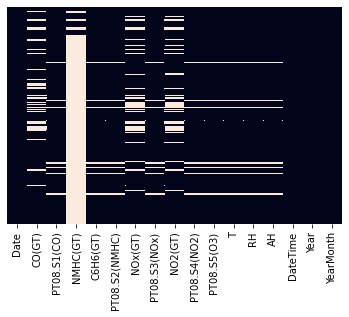

In [ ]:
data= data.replace(-200,np.nan)
print(data.head())
print(data.isnull().any())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
print(data.isnull().sum()/len(data))
data.drop(['NMHC(GT)'], axis= 1, inplace= True)
data.isnull().sum()


DATA Cleaning

In [ ]:
data['CO(GT)'] = data['CO(GT)'].fillna(method='ffill')
data['PT08.S1(CO)'] = data.groupby("Date")['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].mean())
data['C6H6(GT)'] = data.groupby("Date")['C6H6(GT)'].fillna(data['C6H6(GT)'].mean())
data['PT08.S2(NMHC)'] = data.groupby("Date")['PT08.S2(NMHC)'].fillna(data['PT08.S2(NMHC)'].mean())
data['NOx(GT)'] = data.groupby("Date")['NOx(GT)'].fillna(data['NOx(GT)'].mean())
data['PT08.S3(NOx)'] = data.groupby("Date")['PT08.S3(NOx)'].fillna(data['PT08.S3(NOx)'].mean())
data['NO2(GT)'] = data.groupby("Date")['NO2(GT)'].fillna(data['NO2(GT)'].mean())
data['PT08.S4(NO2)'] = data.groupby("Date")['PT08.S4(NO2)'].fillna(data['PT08.S4(NO2)'].mean())
data.isnull().sum()

Date               0
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)      366
T                366
RH               366
AH               366
DateTime           0
Year               0
YearMonth          0
dtype: int64

In [ ]:


data = data.fillna(method='ffill')
data.isnull().any()

Date             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
DateTime         False
Year             False
YearMonth        False
dtype: bool

In [ ]:
sns.pairplot(data)

In [ ]:
y = data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
x = data[indep_col]
utils.multiclass.type_of_target(y.iloc[:,0])
utils.multiclass.type_of_target(x.iloc[:,0])
#print(y)
ss = StandardScaler()
x_std = ss.fit_transform(x)

#Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfu(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag = 'AIC')
    rolling_mean = ts.rolling(window = 24).mean()
    rolling_std = ts.rolling(window = 24).std()    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
    #print (dfoutput)


# adfu(y.iloc[:,0])
# adfu(y.iloc[:,1])
# adfu(y.iloc[:,2])
# adfu(y.iloc[:,3])



In [ ]:
for i in range(y.shape[1]):
  output = adfu(y.iloc[:,i])
  print('p-value',output['p-value'])
  if output['p-value'] < 0.05:
    print("Rejecting H0 , Data is Stationary\n")

In [ ]:
for i in range(x.shape[1]):
  output = adfu(x.iloc[:,i])
  print('p-value',output['p-value'])
  if output['p-value'] < 0.05:
    print("Rejecting H0 , Data is Stationary\n")


In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(data[feature_columns])


#Regression Analysis

Linearity Test with plots

In [ ]:
for i in indep_col:
    sns.lmplot(x=i,y='CO(GT)',data=data)
    #plt.savefig(i+'.jpg')
for i in indep_col:
    sns.lmplot(x=i,y='C6H6(GT)',data=data)
    #plt.savefig(i+'AH'+'.jpg')
for i in indep_col:
    sns.lmplot(x=i,y='NOx(GT)', data=data)
for i in indep_col:
    sns.lmplot(x=i,y='NO2(GT)', data=data)

Normality test using Q-Q plots and Histograms

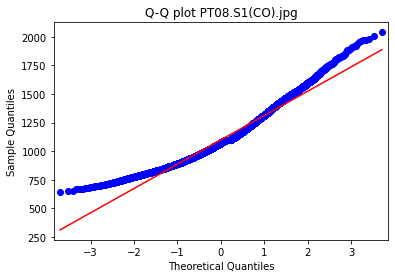

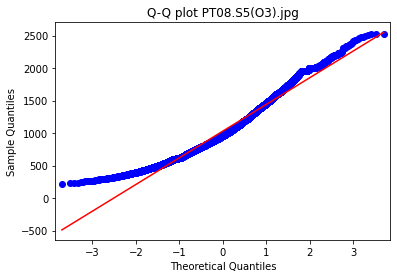

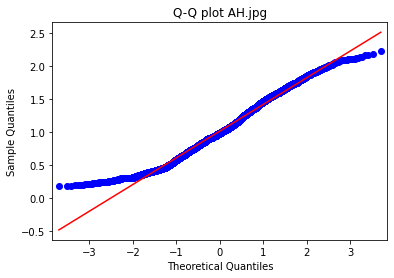

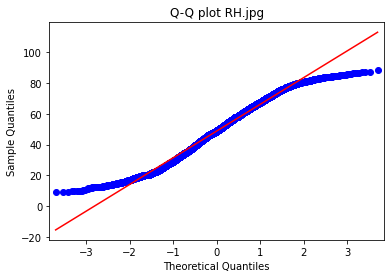

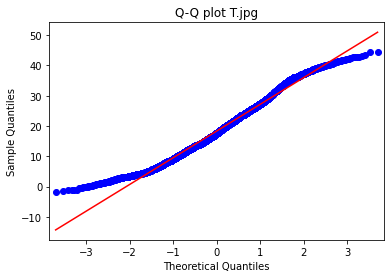

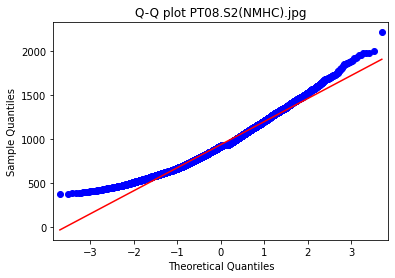

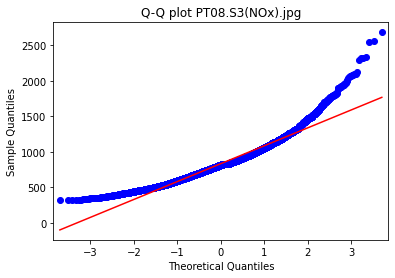

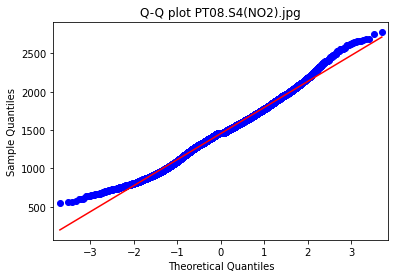

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
for i in feature_columns:
    #fitted_data ,lmbda= stats.yeojohnson(data[i])

    qqplot(data[i], line='s')
    plt.title('Q-Q plot '+i+'.jpg')
    plt.savefig('normality '+i+'.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

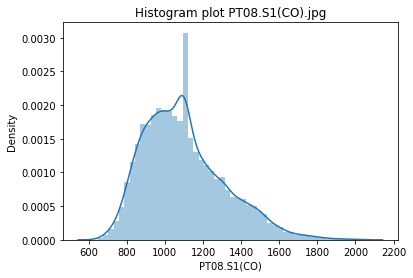

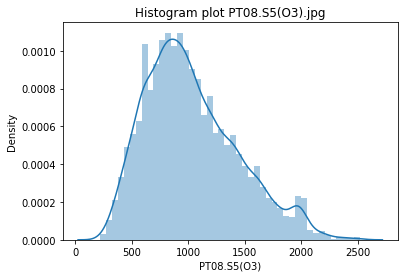

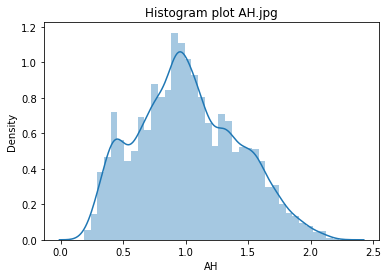

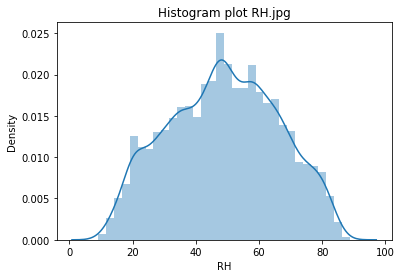

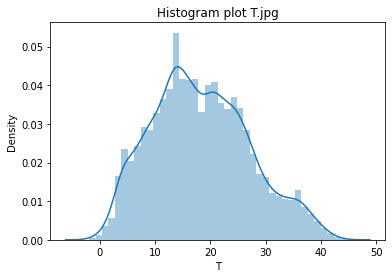

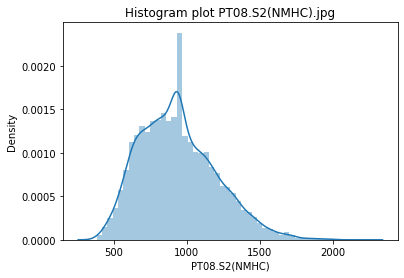

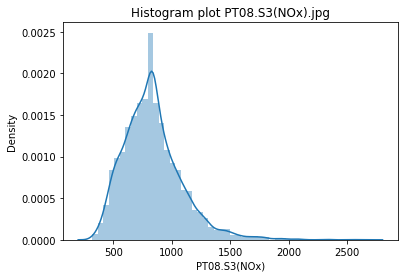

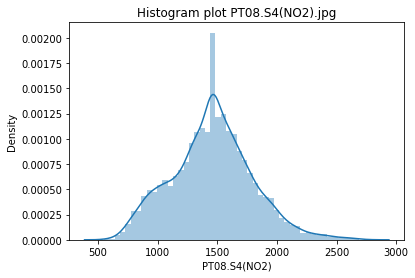

In [ ]:
from scipy import stats
for i in feature_columns:
    #fitted_data ,lmbda= stats.yeojohnson(data[i])
    plt.figure()
    sns.distplot(data[i])
    plt.title('Histogram plot '+i+'.jpg')
    plt.savefig('hist_'+i+'.jpg')

Multicollinearity Check

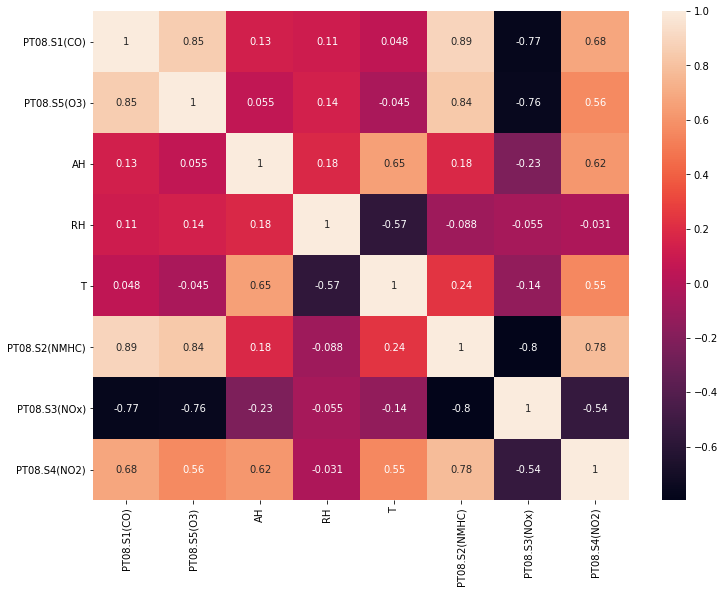

In [ ]:
indep_col = list(set(list(feature_columns)) - set(['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']))
plt.figure(figsize=(12,9))
sns.heatmap(data[indep_col].corr(),annot=True)
plt.savefig('Correlation'+'.jpg')


VIF test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data[feature_columns])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(X.columns)

Index(['const', 'PT08.S2(NMHC)', 'AH', 'PT08.S5(O3)', 'PT08.S1(CO)',
       'PT08.S3(NOx)', 'T', 'RH', 'PT08.S4(NO2)'],
      dtype='object')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data[['PT08.S5(O3)', 'RH', 'AH', 'PT08.S3(NOx)','PT08.S4(NO2)', 'PT08.S1(CO)']])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(X.columns)

Index(['const', 'PT08.S5(O3)', 'RH', 'AH', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S1(CO)'],
      dtype='object')


In [ ]:
vif

[264.51765627767134,
 14.03649673496301,
 9.96032437661133,
 4.981303080145871,
 7.251828764662606,
 4.123031624386101,
 13.378508056355782,
 7.67720208197868,
 8.91573324973523]

Normality test using Shapiro-Wilk Test



In [ ]:
y = data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
x = data[indep_col]
utils.multiclass.type_of_target(y.iloc[:,0])
utils.multiclass.type_of_target(x.iloc[:,0])
print(y)

In [ ]:
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest

# name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
# test = sms.jarque_bera(model.resid)
# lzip(name, test)

for i in feature_columns:
 
  stat, p = normaltest(data[i])
  print(str(i)+'Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('looks Gaussian (fail to reject H0)')
  else:
    print('does not look Gaussian (reject H0)')

#Interpreting Regression Coefficients using Pvalue

In [ ]:
corr = x.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = x.columns[columns]
data_x = data[selected_columns]
x = x[selected_columns]

In [ ]:
# from sklearn.preprocessing import scale, normalize
# x_scaled = pd.DataFrame(normalize(x))
# y_scaled = pd.DataFrame(normalize(y))

In [ ]:
# scaler = StandardScaler().fit(x)
# x_scaled = pd.DataFrame(scaler.transform(x), index=x.index.values, columns=x.columns.values)
# # scaler = StandardScaler().fit(y)
# # y_scaled = pd.DataFrame(scaler.transform(y), index=y.index.values, columns=y.columns.values)
# y_scale = y.copy()
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.1, random_state=42)

In [ ]:
#Scaling Data to (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([0,1]).fit(x)
x_scaled = pd.DataFrame(scaler.transform(x), index=x.index.values, columns=x.columns.values)
# scaler = MinMaxScaler([0,1]).fit(y)
# y_scaled = pd.DataFrame(scaler.transform(y), index=y.index.values, columns=y.columns.values)
y_scaled = y.copy()

In [ ]:

# #Donot run this for the results of

# from scipy import stats
# # for i in range(x_scaled.shape[1]):
# #   x_scaled.iloc[:,i], lamb = stats.yeojohnson(x_scaled.iloc[:,i])
# #   print(lamb)
# #   qqplot(x_scaled.iloc[:,i], line='s')
# for i in range(y_scaled.shape[1]):
#   y_scaled.iloc[:,i] = stats.yeojohnson(y_scaled.iloc[:,i],lmbda = 0.3)
#   #print(lmbda)
#   qqplot(y_scaled.iloc[:,i], line='s')
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.1, random_state=42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.1, random_state=42)
from sklearn.metrics import mean_squared_error
x2_1 = sm.add_constant(x_train)
est_CO = sm.OLS(y_train.iloc[:,0],x2_1)
est2_CO = est_CO.fit()
y_pred = est2_CO.predict(x2_1)
res = mean_squared_error(y_train.iloc[:,0],y_pred)
print(est2_CO.summary())
print("Train MSE = ",res)

y_pred = est2_CO.predict(sm.add_constant(x_test))
res = mean_squared_error(y_test.iloc[:,0],y_pred)
print("Test MSE = ",res)



x2_2 = sm.add_constant(x_train)
est_C6 = sm.OLS(y_train.iloc[:,1],x2_1)
est2_C6 = est_C6.fit()
y_pred = est2_C6.predict(x2_2)
res = mean_squared_error(y_train.iloc[:,1],y_pred)
print(est2_C6.summary())
print("MSE = ",res)

y_pred = est2_C6.predict(sm.add_constant(x_test))
res = mean_squared_error(y_test.iloc[:,1],y_pred)
print("Test MSE = ",res)

x2_3 = sm.add_constant(x_train)
est_NOx = sm.OLS(y_train.iloc[:,2],x2_1)
est2_NOx = est_NOx.fit()
y_pred = est2_NOx.predict(x2_3)
res = mean_squared_error(y_train.iloc[:,2],y_pred)
print(est2_NOx.summary())
print("MSE = ",res)

y_pred = est2_NOx.predict(sm.add_constant(x_test))
res = mean_squared_error(y_test.iloc[:,2],y_pred)
print("Test MSE = ",res)

x2_4 = sm.add_constant(x_train)
est_NO2 = sm.OLS(y_train.iloc[:,3],x2_1)
est2_NO2 = est_NO2.fit()
y_pred = est2_NO2.predict(x2_4)
res = mean_squared_error(y_train.iloc[:,3],y_pred)
print(est2_NO2.summary())
print("MSE = ",res)

y_pred = est2_NO2.predict(sm.add_constant(x_test))
res = mean_squared_error(y_test.iloc[:,3],y_pred)
print("Test MSE = ",res)

#'PT08.S2(NMHC)', 'AH', 'PT08.S5(O3)', 'PT08.S1(CO)',
#      'PT08.S3(NOx)', 'T', 'RH', 'PT08.S4(NO2)'

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1911.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:14:46   Log-Likelihood:                -10795.
No. Observations:                8421   AIC:                         2.161e+04
Df Residuals:                    8412   BIC:                         2.167e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7852      0.112     -7.013

In [ ]:
#After removing Features

x2_1 = sm.add_constant(x_train)
#x2_1 = x_train.copy()
x2_1.drop(['RH'],axis= 1, inplace= True)
est_CO = sm.OLS(y_train.iloc[:,0],x2_1)
est2_CO = est_CO.fit()
print(est2_CO.summary())
y_pred = est2_CO.predict(x2_1)
res = mean_squared_error(y_train.iloc[:,0],y_pred)
print(" Train MSE = ",res)

x2_1_test = sm.add_constant(x_test)
#x2_1_test = x_test.copy()
x2_1_test.drop(['RH'],axis= 1, inplace= True)
y_pred = est2_CO.predict(x2_1_test)
res = mean_squared_error(y_test.iloc[:,0],y_pred)
print("Test MSE = ",res)



x2_2 = sm.add_constant(x_train)
#x2_2 = x_train.copy()
x2_2.drop(['PT08.S5(O3)'],axis= 1, inplace= True)
est_C6 = sm.OLS(y_train.iloc[:,1],x2_2)
est2_C6 = est_C6.fit()
print(est2_C6.summary())
y_pred = est2_C6.predict(x2_2)
res = mean_squared_error(y_train.iloc[:,1],y_pred)
print("Train MSE = ",res)

#x2_2_test = x_test.copy()
x2_2_test = sm.add_constant(x_test)
x2_2_test.drop(['PT08.S5(O3)'],axis = 1,inplace = True)
y_pred = est2_C6.predict(x2_2_test)
res = mean_squared_error(y_test.iloc[:,1],y_pred)
print("Test MSE = ",res)


x2_3 = sm.add_constant(x_train)
#x2_3 = x_train.copy()
x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
#x2_3.drop([7],axis= 1, inplace= True)
est_NOx = sm.OLS(y_train.iloc[:,2],x2_3)
est2_NOx = est_NOx.fit()
print(est2_NOx.summary())
y_pred = est2_NOx.predict(x2_3)
res = mean_squared_error(y_train.iloc[:,2],y_pred)
print("Train MSE = ",res)

#x2_3_test = x_test.copy()
x2_3_test = sm.add_constant(x_test)
x2_3_test.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
#x2_3_test.drop([7],axis= 1, inplace= True)
y_pred = est2_NOx.predict(x2_3_test)
res = mean_squared_error(y_test.iloc[:,2],y_pred)
print("Test MSE = ",res)



x2_4 = sm.add_constant(x_train)
#x2_4 = x_train.copy()
x2_4.drop(['T'],axis= 1, inplace= True)
est_NO2 = sm.OLS(y_train.iloc[:,3],x2_4)
est2_NO2 = est_NO2.fit()
print(est2_NO2.summary())
y_pred = est2_NO2.predict(x2_4)
res = mean_squared_error(y_train.iloc[:,3],y_pred)
print("Train MSE = ",res)

#x2_4_test = x_test.copy()
x2_4_test = sm.add_constant(x_test)
x2_4_test.drop(['T'],axis= 1, inplace= True)
y_pred = est2_NO2.predict(x2_4_test)
res = mean_squared_error(y_test.iloc[:,3],y_pred)
print("Test MSE = ",res)



                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2184.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:18:19   Log-Likelihood:                -10796.
No. Observations:                8421   AIC:                         2.161e+04
Df Residuals:                    8413   BIC:                         2.166e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8428      0.082    -10.322

Normality Test for residuals

Resiudal plots after dropping independent variables

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

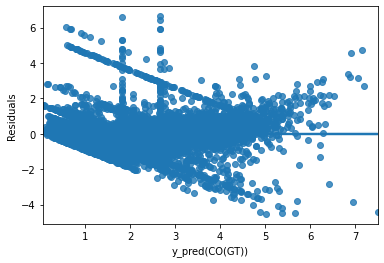

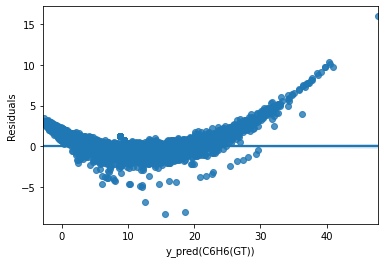

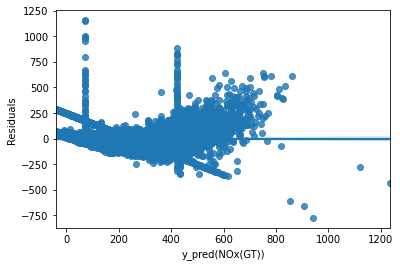

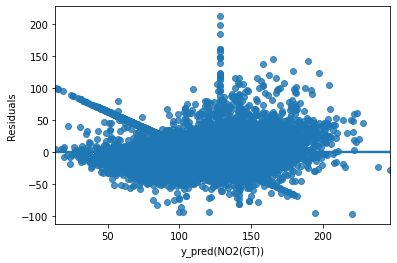

In [ ]:
#x3 = sm.add_constant(x_train)
#x2_1 = sm.add_constant(x_train)
#x2_1 = x_train.copy()
#x2_1.drop(['RH'],axis= 1, inplace= True)
y_train_pred1 = est2_CO.predict(x2_1)
resid1 = (y_train.iloc[:,0] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_CO'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_2 = sm.add_constant(x_train)
#x2_2 = x_train.copy()
#x2_2.drop(['PT08.S5(O3)'],axis= 1, inplace= True)
y_train_pred1 = est2_C6.predict(x2_2)
resid1 = (y_train.iloc[:,1] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(C6H6(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_C6'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_3 = sm.add_constant(x_train)
#x2_3 = x_train.copy()
#x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
#x2_3.drop(['AH','T','PT08.S1(CO)'],axis= 1, inplace= True)
y_train_pred1 = est2_NOx.predict(x2_3)
resid1 = (y_train.iloc[:,2] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(NOx(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NOx'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_4 = sm.add_constant(x_train)
#x2_4 = x_train.copy()
#x2_4.drop(['T'],axis= 1, inplace= True)
y_train_pred1 = est2_NO2.predict(x2_4)
resid1 = (y_train.iloc[:,3] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(NO2(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NO2'+'.jpg')

Text(0.5, 1.0, 'Q-Q plot residuals CO(GT)')

<Figure size 432x288 with 0 Axes>

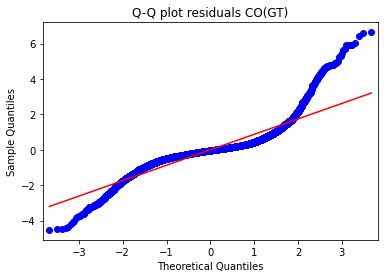

<Figure size 432x288 with 0 Axes>

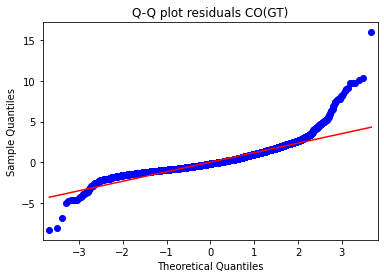

<Figure size 432x288 with 0 Axes>

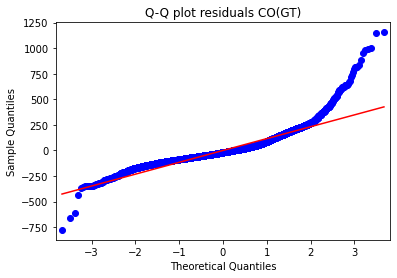

<Figure size 432x288 with 0 Axes>

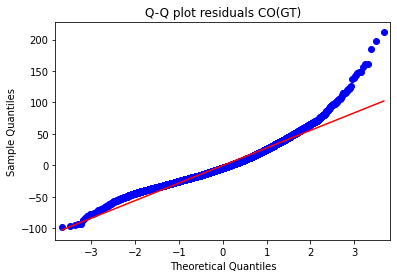

In [ ]:

from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(est2_CO.resid, line='s')
plt.title("Q-Q plot residuals CO(GT)")

plt.figure()
qqplot(est2_C6.resid, line='s')
plt.title("Q-Q plot residuals CO(GT)")

plt.figure()
qqplot(est2_NOx.resid, line='s')
plt.title("Q-Q plot residuals CO(GT)")

plt.figure()
qqplot(est2_NO2.resid, line='s')
plt.title("Q-Q plot residuals CO(GT)")
plt.savefig('Residual Q-Q'+i+'.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

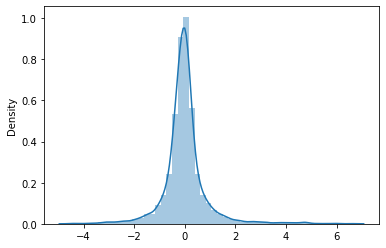

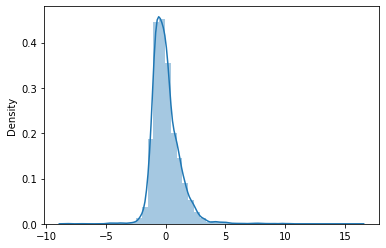

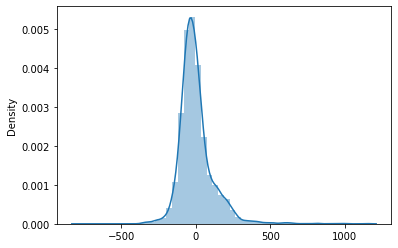

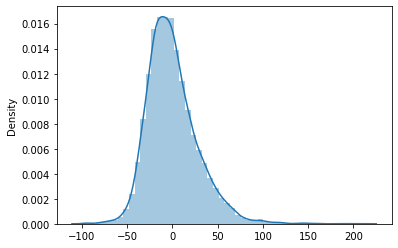

In [ ]:
from scipy import stats

plt.figure()
sns.distplot(est2_CO.resid)

plt.figure()
sns.distplot(est2_C6.resid)

plt.figure()
sns.distplot(est2_NOx.resid)

plt.figure()
sns.distplot(est2_NO2.resid)


In [ ]:
sm.graphics.influence_plot(est2_CO)

#Outliers Removal CO

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


(123,)

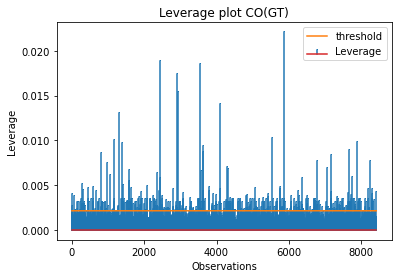

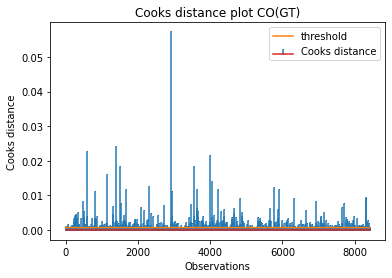

In [ ]:
influence = est2_CO.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_CO.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot CO(GT)')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_CO.jpg')

(c, p) = influence.cooks_distance
temp =(4*np.mean(c))
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),temp*np.ones(len(c)))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot CO(GT)')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_CO.jpg')

out_lev = np.where(c1>2*(est2_CO.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape



In [ ]:
x2_1.iloc[final_out,:]  =None
y_train_CO = y_train.iloc[:,0]
y_train_CO.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_1.isnull().sum()
x2_1 = x2_1.dropna(axis=0)
#x2_1.isnull().sum()
y_train_CO.isnull().sum()
y_train_CO = y_train_CO.dropna(axis=0)

est_CO_mod = sm.OLS(y_train_CO.iloc[:],x2_1)
est2_CO_mod = est_CO_mod.fit()
print(est2_CO_mod.summary())
y_pred = est2_CO_mod.predict(x2_1)
res = mean_squared_error(y_train_CO.iloc[:],y_pred)
print("Train MSE = ",res)

y_pred = est2_CO_mod.predict(x2_1_test)
res = mean_squared_error(y_test.iloc[:,0],y_pred)
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2267.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:23:07   Log-Likelihood:                -10072.
No. Observations:                8298   AIC:                         2.016e+04
Df Residuals:                    8290   BIC:                         2.022e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7970      0.082     -9.681

#Outliers removal C6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(116,)

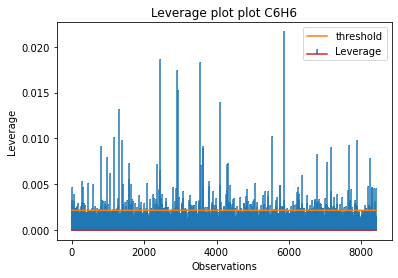

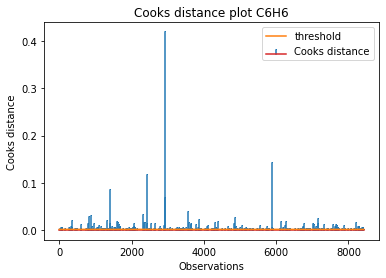

In [ ]:
influence = est2_C6.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_C6.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot plot C6H6')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_C6H6.jpg')

(c, p) = influence.cooks_distance
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),((4*np.mean(c)*np.ones(len(c)))))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot C6H6')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_C6H6.jpg')

out_lev = np.where(c1>2*(est2_C6.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape

In [ ]:
x2_2.iloc[final_out,:]  =None
y_train_C6 = y_train.iloc[:,1]
y_train_C6.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_2.isnull().sum()
x2_2 = x2_2.dropna(axis=0)
#x2_1.isnull().sum()
y_train_C6.isnull().sum()
y_train_C6 = y_train_C6.dropna(axis=0)
#x2_1 = x2_1.drop(['PT08.S2(NMHC)','T'], axis = 1)
est_C6_mod = sm.OLS(y_train_C6.iloc[:],x2_2)
est2_C6_mod = est_C6_mod.fit()
print(est2_C6_mod.summary())
y_pred = est2_C6_mod.predict(x2_2)
res = mean_squared_error(y_train_C6.iloc[:],y_pred)
print("Train MSE = ",res)

y_pred = est2_C6_mod.predict(x2_2_test)
res = mean_squared_error(y_test.iloc[:,1],y_pred)
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.453e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:23:39   Log-Likelihood:                -11713.
No. Observations:                8305   AIC:                         2.344e+04
Df Residuals:                    8297   BIC:                         2.350e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.0499      0.140    -64.751

#Outlier Removal Nox

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(181,)

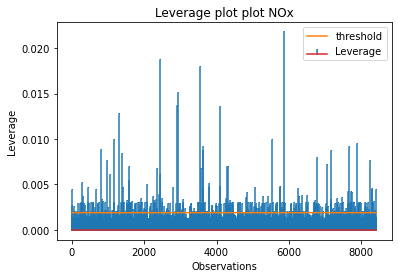

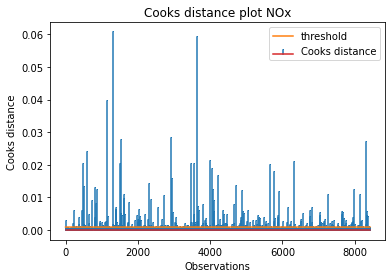

In [ ]:
influence = est2_NOx.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_NOx.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot plot NOx')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_NOx.jpg')

(c, p) = influence.cooks_distance
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),((4*np.mean(c)*np.ones(len(c)))))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot NOx')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_NOx.jpg')


out_lev = np.where(c1>2*(est2_NOx.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape

In [ ]:
x2_3.iloc[final_out,:]  =None
y_train_NOx = y_train.iloc[:,2]
y_train_NOx.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_3.isnull().sum()
x2_3 = x2_3.dropna(axis=0)
#x2_1.isnull().sum()
y_train_NOx.isnull().sum()
y_train_NOx = y_train_NOx.dropna(axis=0)
#x2_1 = x2_1.drop(['PT08.S2(NMHC)','T'], axis = 1)
est_NOx_mod = sm.OLS(y_train_NOx.iloc[:],x2_3)
est2_NOx_mod = est_NOx_mod.fit()
print(est2_NOx_mod.summary())
y_pred = est2_NOx_mod.predict(x2_3)
res = mean_squared_error(y_train_NOx.iloc[:],y_pred)
print("MSE = ",res)

y_pred = est2_NOx_mod.predict(x2_3_test)
res = mean_squared_error(y_test.iloc[:,2],y_pred)
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:                NOx(GT)   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3250.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:24:12   Log-Likelihood:                -49409.
No. Observations:                8240   AIC:                         9.883e+04
Df Residuals:                    8233   BIC:                         9.888e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -116.4207     10.360    -11.238

#Outliers removal NO2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


(128,)

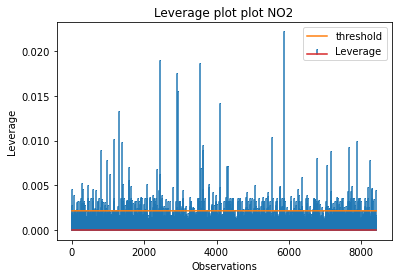

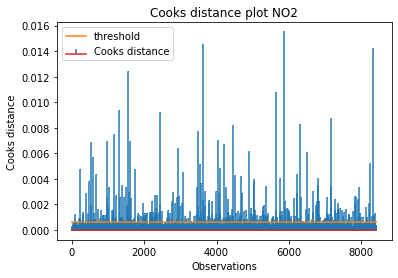

In [ ]:
influence = est2_NO2.get_influence()
c1 = influence.hat_matrix_diag
plt.figure()
plt.stem(np.arange(len(c1)), c1, markerfmt=",")
plt.plot(np.arange(len(c1)),((2*(est2_NO2.model.exog.shape[1]+1))/len(c1)*np.ones(len(c1))))
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage plot plot NO2')
plt.legend(['threshold','Leverage'])
plt.savefig('Leverage_NO2.jpg')


(c, p) = influence.cooks_distance
plt.figure()
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.plot(np.arange(len(c)),((4*np.mean(c)*np.ones(len(c)))))
plt.xlabel('Observations')
plt.ylabel('Cooks distance')
plt.title('Cooks distance plot NO2')
plt.legend(['threshold','Cooks distance'])
plt.savefig('Cooks_distance_NO2.jpg')


out_lev = np.where(c1>2*(est2_NO2.model.exog.shape[1]+1)/len(c1))
out = np.where(c>4*np.mean(c))
final_out = np.intersect1d(out, out_lev)
final_out.shape

In [ ]:

x2_4.iloc[final_out,:]  =None
y_train_NO2 = y_train.iloc[:,3]
y_train_NO2.iloc[final_out]  =None
#x2_1.drop(index = final_out)
x2_4.isnull().sum()
x2_4 = x2_4.dropna(axis=0)
#x2_1.isnull().sum()
y_train_NO2.isnull().sum()
y_train_NO2 = y_train_NO2.dropna(axis=0)
#x2_1 = x2_1.drop(['PT08.S2(NMHC)','T'], axis = 1)
est_NO2_mod = sm.OLS(y_train_NO2.iloc[:],x2_4)
est2_NO2_mod = est_NO2_mod.fit()
print(est2_NO2_mod.summary())
y_pred = est2_NO2_mod.predict(x2_4)
res = mean_squared_error(y_train_NO2.iloc[:],y_pred)
print("Test MSE = ",res)

y_pred = est2_NO2_mod.predict(x2_4_test)
res = mean_squared_error(y_test.iloc[:,3],y_pred)
print("Test MSE = ",res)

                            OLS Regression Results                            
Dep. Variable:                NO2(GT)   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1861.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:24:45   Log-Likelihood:                -39144.
No. Observations:                8293   AIC:                         7.830e+04
Df Residuals:                    8285   BIC:                         7.836e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           157.9580      2.889     54.679

Residual plots after removing outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

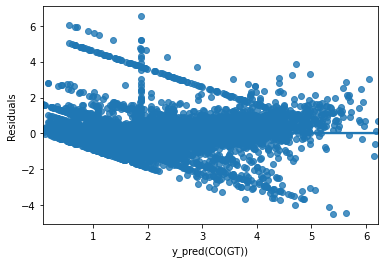

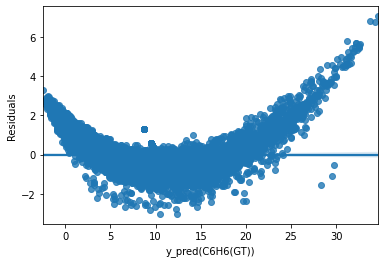

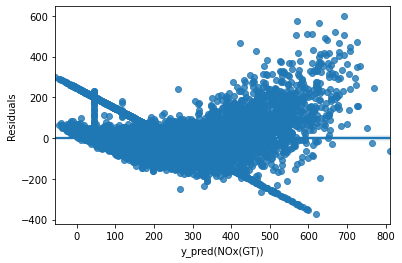

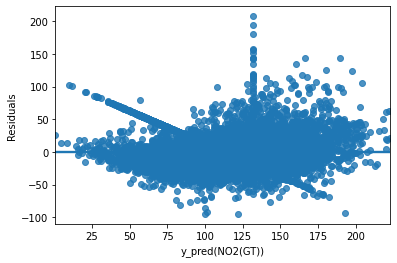

In [ ]:
#x2_1 = sm.add_constant(x_train)
#x2_1 = x_train.copy()
#x2_1.drop(['RH'],axis= 1, inplace= True)
y_train_pred1 = est2_CO_mod.predict(x2_1)
resid1 = (y_train_CO.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_CO_out'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_2 = sm.add_constant(x_train)
#x2_2 = x_train.copy()
#x2_2.drop(['PT08.S5(O3)'],axis= 1, inplace= True)
y_train_pred1 = est2_C6_mod.predict(x2_2)
resid1 = (y_train_C6.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(C6H6(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_C6_out'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_3 = sm.add_constant(x_train)
#x2_3 = x_train.copy()
#x2_3.drop(['PT08.S1(CO)','T'],axis= 1, inplace= True)
y_train_pred1 = est2_NOx_mod.predict(x2_3)
resid1 = (y_train_NOx.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(NOx(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NOx_out'+'.jpg')

#x3 = sm.add_constant(x_train)
#x2_4 = sm.add_constant(x_train)
#x2_4 = x_train.copy()
#x2_4.drop(['T'],axis= 1, inplace= True)
y_train_pred1 = est2_NO2_mod.predict(x2_4)
resid1 = (y_train_NO2.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(NO2(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NO2_out'+'.jpg')

<Figure size 432x288 with 0 Axes>

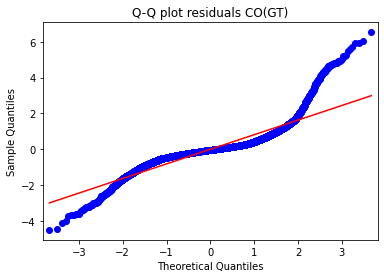

<Figure size 432x288 with 0 Axes>

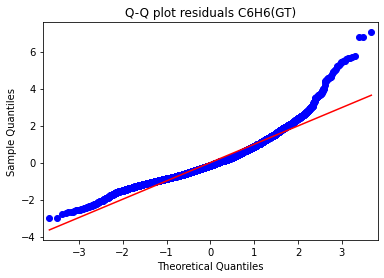

<Figure size 432x288 with 0 Axes>

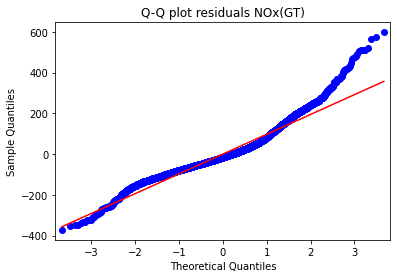

<Figure size 432x288 with 0 Axes>

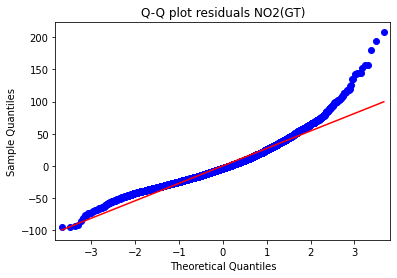

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(est2_CO_mod.resid, line='s')
plt.title("Q-Q plot residuals CO(GT)")
plt.savefig('Q_Q_CO_out'+'.jpg')

plt.figure()
qqplot(est2_C6_mod.resid, line='s')
plt.title("Q-Q plot residuals C6H6(GT)")
plt.savefig('Q_Q_C6H6_out'+'.jpg')

plt.figure()
qqplot(est2_NOx_mod.resid, line='s')
plt.title("Q-Q plot residuals NOx(GT)")
plt.savefig('Q_Q_NOx_out'+'.jpg')

plt.figure()
qqplot(est2_NO2_mod.resid, line='s')
plt.title("Q-Q plot residuals NO2(GT)")
plt.savefig('Q_Q_NO2_out'+'.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

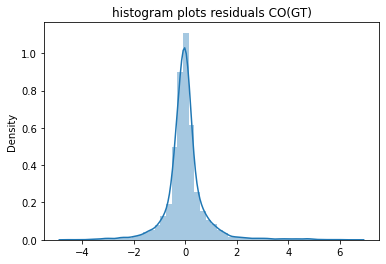

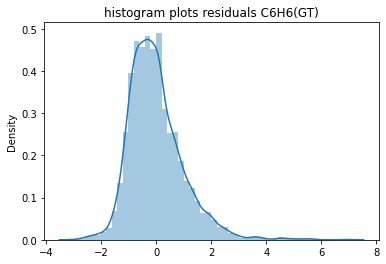

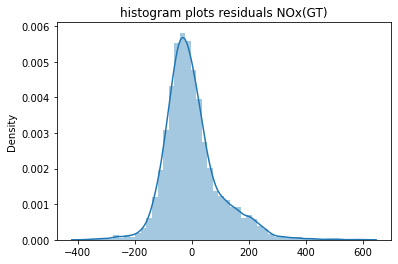

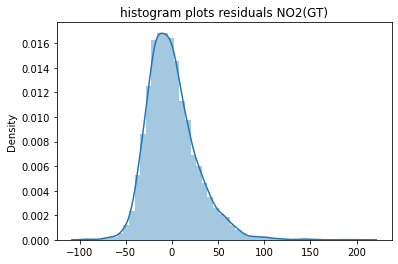

In [ ]:
from scipy import stats

plt.figure()
sns.distplot(est2_CO_mod.resid)
plt.title("histogram plots residuals CO(GT)")
plt.savefig('hist_CO_out'+'.jpg')

plt.figure()
sns.distplot(est2_C6_mod.resid)
plt.title("histogram plots residuals C6H6(GT)")
plt.savefig('hist_C6H6_out'+'.jpg')

plt.figure()
sns.distplot(est2_NOx_mod.resid)
plt.title("histogram plots residuals NOx(GT)")
plt.savefig('hist_NOx_out'+'.jpg')

plt.figure()
sns.distplot(est2_NO2_mod.resid)
plt.title("histogram plots residuals NO2(GT)")
plt.savefig('hist_NO2_out'+'.jpg')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
white_test = het_white(est2.resid, est2.model.exog)
#bp_test = het_breuschpagan(est2.resid, est2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
#print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))


{'LM Statistic': 1644.848979347886, 'LM-Test p-value': 0.0, 'F-Statistic': 49.57811952951766, 'F-Test p-value': 0.0}


#Bartlett_Sphericity Test and PCA

In [ ]:
!pip install factor-analyzer

     |████████████████████████████████| 40kB 3.9MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=5cd0045ef5db0c6abed4e81add1511d8b9e53bab20bdf1f2a93f53d6f66de2b3
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
# from sklearn.decomposition import FactorAnalysis
# FA = FactorAnalysis(n_components = 3).fit_transform(x.values)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x2_3.iloc[:,1:])
print(chi_square_value,p_value)

42260.598571390954 0.0


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x2_1.iloc[:,1:])
print(kmo_model)

0.707353928007103


/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [ ]:
#stats.bartlett(x2_2.iloc[:,0],x2_2.iloc[:,1],x2_2.iloc[:,2],x2_2.iloc[:,3],x2_2.iloc[:,4],x2_2.iloc[:,5],x2_2.iloc[:,6],x2_2.iloc[:,7])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2241: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


BartlettResult(statistic=inf, pvalue=0.0)

#PCA

#PCA CO

Explained Variance 95: [0.52901411 0.32988929 0.07553164 0.03059596 0.01851868 0.01200939]
6
Explained Variance 99: [0.52901411 0.32988929 0.07553164 0.03059596 0.01851868 0.01200939]
6
                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2418.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:58:42   Log-Likelihood:                -10312.
No. Observations:                8298   AIC:                         2.064e+04
Df Residuals:                    8291   BIC:                         2.069e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


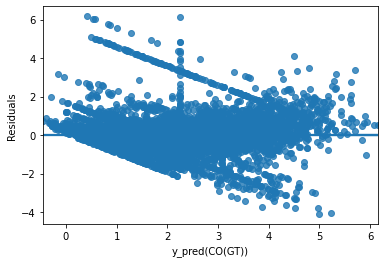

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.99)
fit_95 = pca_95.fit(x2_1.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_1.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_CO_95 = pca_95.fit_transform(x2_1.iloc[:,1:])
x_PCA_CO_99 = pca_99.fit_transform(x2_1.iloc[:,1:])

est_CO_mod_PCA = sm.OLS(y_train_CO.iloc[:],sm.add_constant(x_PCA_CO_95))
est2_CO_mod_PCA = est_CO_mod_PCA.fit()
print(est2_CO_mod_PCA.summary())
y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
res = mean_squared_error(y_train_CO.iloc[:],y_pred)
print("Train MSE = ",res)

x_PCA_CO_95_test = pca_95.transform(x2_1_test.iloc[:,1:])
y_pred = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95_test))
res = mean_squared_error(y_test.iloc[:,0],y_pred)
print("Test MSE = ",res)

y_train_pred1 = est2_CO_mod_PCA.predict(sm.add_constant(x_PCA_CO_95))
resid1 = (y_train_CO.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(CO(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_CO_PCA_99'+'.jpg')

#PCA C6

Explained Variance 95: [0.43533069 0.30738307 0.21080658 0.02479003 0.01076332 0.00727019]
6
Explained Variance 99: [0.43533069 0.30738307 0.21080658 0.02479003 0.01076332 0.00727019]
6
                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.294e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:58:52   Log-Likelihood:                -15794.
No. Observations:                8305   AIC:                         3.160e+04
Df Residuals:                    8298   BIC:                         3.165e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


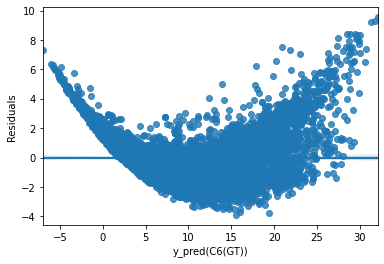

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.99)
fit_95 = pca_95.fit(x2_2.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_2.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_C6_95 = pca_95.fit_transform(x2_2.iloc[:,1:])
x_PCA_C6_99 = pca_99.fit_transform(x2_2.iloc[:,1:])
est_C6_mod_PCA = sm.OLS(y_train_C6.iloc[:],sm.add_constant(x_PCA_C6_95))
est2_C6_mod_PCA = est_C6_mod_PCA.fit()
print(est2_C6_mod_PCA.summary())
y_pred = est2_C6_mod_PCA.predict(sm.add_constant(x_PCA_C6_95))
res = mean_squared_error(y_train_C6.iloc[:],y_pred)
print("Train MSE = ",res)


x_PCA_C6_95_test = pca_95.transform(x2_2_test.iloc[:,1:])
y_pred = est2_C6_mod_PCA.predict(sm.add_constant(x_PCA_C6_95_test))
res = mean_squared_error(y_test.iloc[:,1],y_pred)
print("Test MSE = ",res)

y_train_pred1 = est2_C6_mod_PCA.predict(sm.add_constant(x_PCA_C6_95))
resid1 = (y_train_C6.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(C6(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_C6_PCA_99'+'.jpg')

#PCA NOx

Explained Variance 95: [0.43387183 0.29360702 0.21954737 0.03181841 0.01674738]
5
Explained Variance 99: [0.43387183 0.29360702 0.21954737 0.03181841 0.01674738]
5
                            OLS Regression Results                            
Dep. Variable:                NOx(GT)   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2805.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:58:57   Log-Likelihood:                -50316.
No. Observations:                8240   AIC:                         1.006e+05
Df Residuals:                    8234   BIC:                         1.007e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


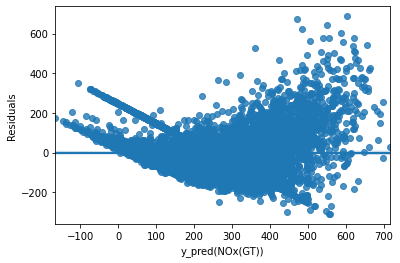

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.99)
fit_95 = pca_95.fit(x2_3.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_3.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_NOx_95 = pca_95.fit_transform(x2_3.iloc[:,1:])
x_PCA_NOx_99 = pca_99.fit_transform(x2_3.iloc[:,1:])
est_NOx_mod_PCA = sm.OLS(y_train_NOx.iloc[:],sm.add_constant(x_PCA_NOx_95))
est2_NOx_mod_PCA = est_NOx_mod_PCA.fit()
print(est2_NOx_mod_PCA.summary())

y_pred = est2_NOx_mod_PCA.predict(sm.add_constant(x_PCA_NOx_95))
res = mean_squared_error(y_train_NOx.iloc[:],y_pred)
print("Train MSE = ",res)


x_PCA_NOx_95_test = pca_95.transform(x2_3_test.iloc[:,1:])
y_pred = est2_NOx_mod_PCA.predict(sm.add_constant(x_PCA_NOx_95_test))
res = mean_squared_error(y_test.iloc[:,2],y_pred)
print("Test MSE = ",res)

y_train_pred1 = est2_NOx_mod_PCA.predict(sm.add_constant(x_PCA_NOx_95))
resid1 = (y_train_NOx.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(NOx(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NOx_PCA_99'+'.jpg')


#PCA NO2

Explained Variance 95: [0.47196006 0.26237942 0.20521324 0.02854562 0.01717438 0.01087767]
6
Explained Variance 99: [0.47196006 0.26237942 0.20521324 0.02854562 0.01717438 0.01087767]
6
                            OLS Regression Results                            
Dep. Variable:                NO2(GT)   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     2171.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:59:04   Log-Likelihood:                -39144.
No. Observations:                8293   AIC:                         7.830e+04
Df Residuals:                    8286   BIC:                         7.835e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


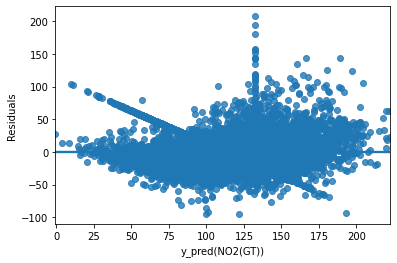

In [ ]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.99)
fit_95 = pca_95.fit(x2_4.iloc[:,1:])
# summarize components
print("Explained Variance 95: %s" % fit_95.explained_variance_ratio_)
print(fit_95.n_components_)

pca_99 = PCA(0.99)
fit_99 = pca_99.fit(x2_4.iloc[:,1:])
print("Explained Variance 99: %s" % fit_99.explained_variance_ratio_)
print(fit_99.n_components_)

x_PCA_NO2_95 = pca_95.fit_transform(x2_4.iloc[:,1:])
x_PCA_NO2_99 = pca_99.fit_transform(x2_4.iloc[:,1:])
est_NO2_mod_PCA = sm.OLS(y_train_NO2.iloc[:],sm.add_constant(x_PCA_NO2_95))
est2_NO2_mod_PCA = est_NO2_mod_PCA.fit()
print(est2_NO2_mod_PCA.summary())

y_pred = est2_NO2_mod_PCA.predict(sm.add_constant(x_PCA_NO2_95))
res = mean_squared_error(y_train_NO2.iloc[:],y_pred)
print("Train MSE = ",res)


x_PCA_NO2_95_test = pca_95.transform(x2_4_test.iloc[:,1:])
y_pred = est2_NO2_mod_PCA.predict(sm.add_constant(x_PCA_NO2_95_test))
res = mean_squared_error(y_test.iloc[:,3],y_pred)
print("Test MSE = ",res)

y_train_pred1 = est2_NO2_mod_PCA.predict(sm.add_constant(x_PCA_NO2_95))
resid1 = (y_train_NO2.iloc[:] - y_train_pred1)
plt.figure()
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(NO2(GT))")
plt.ylabel("Residuals")
plt.savefig('Hetero_NO2_PCA_99'+'.jpg')


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
white_test = het_breuschpagan(est2_NO2_mod_PCA.resid, est2_NO2_mod_PCA.model.exog)
#bp_test = het_breuschpagan(est2.resid, est2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
#print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

{'LM Statistic': 316.45344194687425, 'LM-Test p-value': 3.0550909461886634e-67, 'F-Statistic': 82.20204549134552, 'F-Test p-value': 1.519636512528547e-68}


<Figure size 432x288 with 0 Axes>

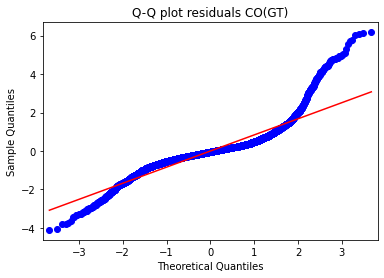

<Figure size 432x288 with 0 Axes>

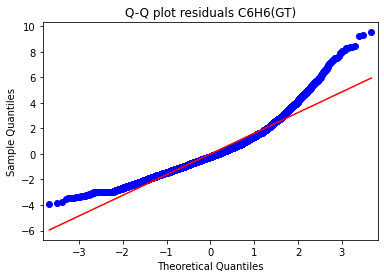

<Figure size 432x288 with 0 Axes>

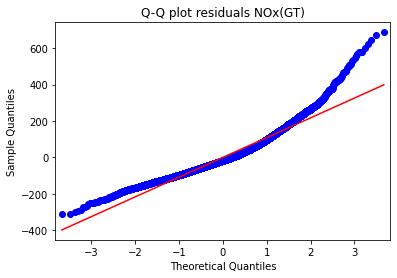

<Figure size 432x288 with 0 Axes>

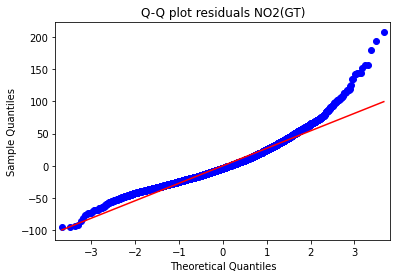

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(est2_CO_mod_PCA.resid, line='s')
plt.title("Q-Q plot residuals CO(GT)")
plt.savefig('Q_Q_CO_pca_99'+'.jpg')

plt.figure()
qqplot(est2_C6_mod_PCA.resid, line='s')
plt.title("Q-Q plot residuals C6H6(GT)")
plt.savefig('Q_Q_C6H6_pca_99'+'.jpg')

plt.figure()
qqplot(est2_NOx_mod_PCA.resid, line='s')
plt.title("Q-Q plot residuals NOx(GT)")
plt.savefig('Q_Q_NOx_pca_99'+'.jpg')

plt.figure()
qqplot(est2_NO2_mod_PCA.resid, line='s')
plt.title("Q-Q plot residuals NO2(GT)")
plt.savefig('Q_Q_NO2_pca_99'+'.jpg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

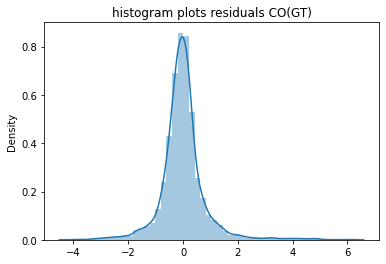

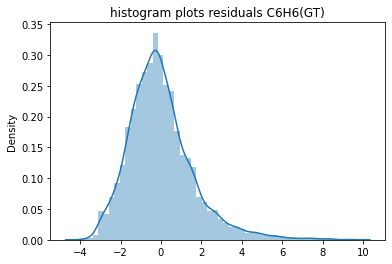

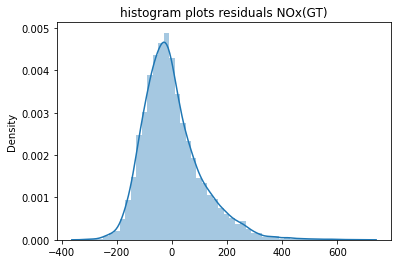

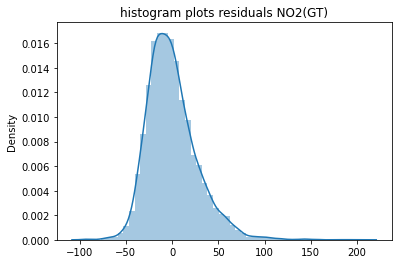

In [ ]:
from scipy import stats

plt.figure()
sns.distplot(est2_CO_mod_PCA.resid)
plt.title("histogram plots residuals CO(GT)")
plt.savefig('hist_CO_pca_99'+'.jpg')

plt.figure()
sns.distplot(est2_C6_mod_PCA.resid)
plt.title("histogram plots residuals C6H6(GT)")
plt.savefig('hist_C6H6_pca_99'+'.jpg')

plt.figure()
sns.distplot(est2_NOx_mod_PCA.resid)
plt.title("histogram plots residuals NOx(GT)")
plt.savefig('hist_NOx_pca_99'+'.jpg')

plt.figure()
sns.distplot(est2_NO2_mod_PCA.resid)
plt.title("histogram plots residuals NO2(GT)")
plt.savefig('hist_NO2_pca_99'+'.jpg')